In [2]:
import numpy as np

with open('seven_plastics/1_polyethylene_PET/85943598-ec9b-4da5-9221-8c32b5742e72.jpg', 'rb') as path:
    image = np.frombuffer(path.read(), dtype=np.uint8,
                               offset=16)


img_matrix = np.asarray(image)

img_matrix.shape


(28915,)

In [60]:
import os
from PIL import Image
import random

resolution = [100,100]
data = []
train_dataset_x = np.array([])
test_dataset_x = np.array([])

train_dataset_y = np.array([])
test_dataset_y = np.array([])
source_dir = 'seven_plastics'


for nums in  os.listdir(source_dir):
    actual_num  = np.float(nums.split('_')[0])
    
    data = os.listdir(source_dir + '/' + nums)

    random.shuffle(data)
    
    
   
    for img in data[:int(len(data) * 0.9)]:
        img_tmp = Image.open(source_dir + '/' + nums + '/' + img).resize((resolution[0],resolution[1]))

        img_matrix = np.array(img_tmp).astype('uint8')
        
        train_dataset_y = np.append(train_dataset_y, actual_num)
        train_dataset_x = np.append(train_dataset_x ,img_matrix)
    
    for img in data[-int(len(data) * 0.1):]:
        img_tmp = Image.open(source_dir + '/' + nums + '/' + img).resize((resolution[0],resolution[1]))
        img_matrix = np.array(img_tmp).astype('uint8')
        test_dataset_y = np.append(test_dataset_y, actual_num)
        test_dataset_x = np.append(test_dataset_x ,img_matrix)

train_dataset_x = train_dataset_x.reshape((train_dataset_y.shape[0], resolution[0],resolution[1], 3))
test_dataset_x = test_dataset_x.reshape((test_dataset_y.shape[0], resolution[0],resolution[1], 3))


In [35]:
train_dataset_x = train_dataset_x.reshape((train_dataset_y.shape[0], 28, 28, 3))

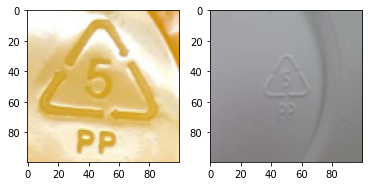

In [61]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

fig = plt.figure()
ax1 = fig.add_subplot(121)
# Bilinear interpolation - this will look blurry
ax1.imshow(train_dataset_x[0].astype('uint8'))

ax2 = fig.add_subplot(122)
# 'nearest' interpolation - faithful but blocky
ax2.imshow(train_dataset_x[1].astype('uint8'))

plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


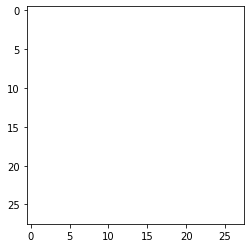

In [53]:
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
img = Image.open('seven_plastics/1_polyethylene_PET/85943598-ec9b-4da5-9221-8c32b5742e72.jpg')
numpydata = np.asarray(img)
 
# data
#print(numpydata)


def visualize_mnist(X, y):
    label_idx = [y == i for i in range(10)]
    #print(y)
    
    #ims = np.array([X[label_idx[i]][:10] for i in range(10)])

    classes = ['T-shirt/top']
    
    	
    fig, ax = plt.subplots()
    img = ax.imshow(X)
    	

    plt.show()
    return img

img = visualize_mnist(train_dataset_x[21], train_dataset_y[20])

In [52]:
img

In [37]:
train_dataset_x.shape

(613, 28, 28, 3)

In [31]:
import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import make_circles, make_moons, make_blobs
from matplotlib import pyplot as plt
import numpy as np
import gzip
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Activation, Flatten, MaxPooling2D
from keras import backend as K




In [43]:
input_shape = (28, 28, 3)


cnn = Sequential()
cnn.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
cnn.add(keras.layers.Dropout(0.4))
cnn.add(Conv2D(64, (3, 3), activation='relu'))
cnn.add(keras.layers.Dropout(0.4))
cnn.add(Conv2D(64, (3, 3), activation='relu'))
cnn.add(keras.layers.Dropout(0.4))
cnn.add(Conv2D(64, (3, 3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Flatten())
cnn.add(keras.layers.Dropout(0.2))
cnn.add(Dense(200, activation='relu'))
cnn.add(keras.layers.Dropout(0.2))
cnn.add(Dense(200, activation='relu'))
cnn.add(keras.layers.Dropout(0.2))
cnn.add(Dense(200, activation='relu'))
cnn.add(Dense(10, activation='softmax'))

cnn.compile(loss='sparse_categorical_crossentropy', optimizer=keras.optimizers.Adam(0.001),  metrics=['accuracy'])

history = cnn.fit(train_dataset_x, train_dataset_y, epochs=40, batch_size=512, 
                  validation_split=0.1, verbose=True)



Epoch 1/40
2/2 [==============================] - 0s 207ms/step - loss: 61.4949 - accuracy: 0.1107 - val_loss: 22.7435 - val_accuracy: 0.0000e+00
Epoch 2/40
2/2 [==============================] - 0s 158ms/step - loss: 99.6413 - accuracy: 0.1543 - val_loss: 4.6590 - val_accuracy: 0.0000e+00
Epoch 3/40
2/2 [==============================] - 0s 149ms/step - loss: 36.7579 - accuracy: 0.1071 - val_loss: 2.7100 - val_accuracy: 0.0000e+00
Epoch 4/40
2/2 [==============================] - 0s 154ms/step - loss: 13.8542 - accuracy: 0.1361 - val_loss: 2.4778 - val_accuracy: 0.0000e+00
Epoch 5/40
2/2 [==============================] - 0s 155ms/step - loss: 6.4091 - accuracy: 0.2269 - val_loss: 2.3350 - val_accuracy: 0.0000e+00
Epoch 6/40
2/2 [==============================] - 0s 144ms/step - loss: 4.4425 - accuracy: 0.2831 - val_loss: 2.3140 - val_accuracy: 0.0000e+00
Epoch 7/40
2/2 [==============================] - 0s 140ms/step - loss: 2.8313 - accuracy: 0.2831 - val_loss: 2.3119 - val_accuracy

In [46]:
test_dataset_x = test_dataset_x.reshape((test_dataset_y.shape[0], 28, 28, 3))

In [47]:
prediction = cnn.predict(test_dataset_x[0])



ValueError: in user code:

    /home/d.gorcak/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1147 predict_function  *
        outputs = self.distribute_strategy.run(
    /home/d.gorcak/anaconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:951 run  **
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /home/d.gorcak/anaconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2290 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /home/d.gorcak/anaconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2649 _call_for_each_replica
        return fn(*args, **kwargs)
    /home/d.gorcak/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1122 predict_step  **
        return self(x, training=False)
    /home/d.gorcak/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer.py:885 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs,
    /home/d.gorcak/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/input_spec.py:176 assert_input_compatibility
        raise ValueError('Input ' + str(input_index) + ' of layer ' +

    ValueError: Input 0 of layer sequential_5 is incompatible with the layer: expected ndim=4, found ndim=3. Full shape received: [None, 28, 3]


In [48]:
test_dataset_x

array([[[[169., 127.,  85.],
         [176., 134.,  92.],
         [187., 145., 106.],
         ...,
         [197., 155., 113.],
         [186., 143., 101.],
         [183., 138.,  97.]],

        [[170., 128.,  86.],
         [177., 135.,  93.],
         [190., 148., 109.],
         ...,
         [199., 157., 115.],
         [188., 146., 104.],
         [186., 141., 100.]],

        [[173., 131.,  89.],
         [179., 137.,  95.],
         [193., 151., 112.],
         ...,
         [200., 161., 118.],
         [190., 150., 107.],
         [188., 145., 104.]],

        ...,

        [[195., 153., 111.],
         [194., 152., 110.],
         [199., 159., 116.],
         ...,
         [223., 183., 138.],
         [206., 165., 121.],
         [197., 155., 113.]],

        [[198., 156., 114.],
         [196., 154., 111.],
         [200., 159., 116.],
         ...,
         [224., 183., 139.],
         [208., 166., 123.],
         [198., 156., 114.]],

        [[200., 159., 115.],
       

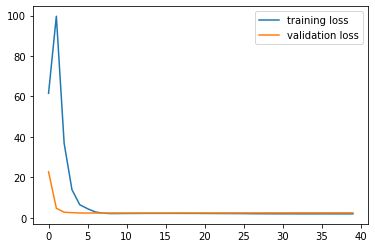

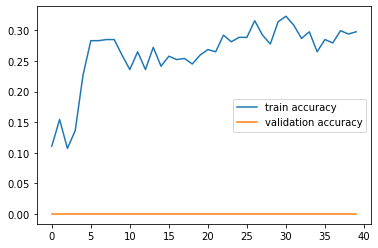

In [45]:
plt.figure()
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.legend(loc='best')

plt.figure()
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.legend(loc='best')
plt.show()